In [65]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [12]:
df=pd.read_csv('Seoul_full.csv')

In [13]:
df_1=pd.read_csv('Seoul_full_test.csv')

In [14]:
df

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2019,1,강남구,건강보조식품 소매업,1,1,31,1405000,36,5,0
1,2019,1,강남구,건강보조식품 소매업,1,2,110,11861050,121,7,0
2,2019,1,강남구,건강보조식품 소매업,1,3,86,26041090,120,6,0
3,2019,1,강남구,건강보조식품 소매업,1,4,191,79951020,333,7,0
4,2019,1,강남구,건강보조식품 소매업,1,5,124,40362670,192,10,0
...,...,...,...,...,...,...,...,...,...,...,...
106860,2020,3,중랑구,화장품 및 방향제 소매업,2,1,608,12830505,708,12,0
106861,2020,3,중랑구,화장품 및 방향제 소매업,2,2,492,13213425,568,12,0
106862,2020,3,중랑구,화장품 및 방향제 소매업,2,3,281,9646440,362,6,0
106863,2020,3,중랑구,화장품 및 방향제 소매업,2,4,1074,50109146,1286,14,0


In [15]:
df_1

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2020,4,강남구,건강보조식품 소매업,1,1,39,688400,39,7,23.0
1,2020,4,강남구,건강보조식품 소매업,1,2,63,1806500,69,6,23.0
2,2020,4,강남구,건강보조식품 소매업,1,3,47,5935900,49,4,23.0
3,2020,4,강남구,건강보조식품 소매업,1,4,49,23188800,78,4,23.0
4,2020,4,강남구,건강보조식품 소매업,1,5,44,5760806,54,3,23.0
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,중랑구,화장품 및 방향제 소매업,2,1,562,11699785,655,10,3.0
6740,2020,4,중랑구,화장품 및 방향제 소매업,2,2,512,15386030,592,11,3.0
6741,2020,4,중랑구,화장품 및 방향제 소매업,2,3,327,11730268,399,7,3.0
6742,2020,4,중랑구,화장품 및 방향제 소매업,2,4,1143,46223490,1333,18,3.0


In [68]:
dtypes = df_1.dtypes
encoders = {}
for column in df_1.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_1[column])
        encoders[column] = encoder
        
df_1_num = df_1.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_1_num[column] = encoder.transform(df_1[column])
    

    
    
    
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [69]:
y_train=df_1_num.loc[:,'이용금액']
X_train=df_1_num.loc[:,df_1_num.columns !='이용금액']

y_test=df_num.loc[:,'이용금액']
X_test=df_num.loc[:,df_num.columns !='이용금액']

In [29]:
X=pd.concat([X_test,X_train])
y=pd.concat([y_test,y_train])

In [31]:
df_2=pd.concat([X,y],axis=1)

In [32]:
df_2

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용건수,유입,확진자수,이용금액
0,2019,1,0,0,1,1,31,36,5,0.0,1405000
1,2019,1,0,0,1,2,110,121,7,0.0,11861050
2,2019,1,0,0,1,3,86,120,6,0.0,26041090
3,2019,1,0,0,1,4,191,333,7,0.0,79951020
4,2019,1,0,0,1,5,124,192,10,0.0,40362670
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,24,38,2,1,562,655,10,3.0,11699785
6740,2020,4,24,38,2,2,512,592,11,3.0,15386030
6741,2020,4,24,38,2,3,327,399,7,3.0,11730268
6742,2020,4,24,38,2,4,1143,1333,18,3.0,46223490


In [34]:
df_2_stats = df_2.describe()
df_2_stats = df_2_stats.transpose()
df_2_stats

,count,mean,std,min,25%,50%,75%,max
년,113609.0,2.019243e+03,4.289287e-01,2019.0,2019.0,2019.0,2019.0,2.020000e+03
월,113609.0,5.524747e+00,3.507977e+00,1.0,3.0,5.0,9.0,1.200000e+01
매장_시군구,113609.0,1.191256e+01,7.275889e+00,0.0,6.0,12.0,18.0,2.400000e+01
업종명,113609.0,1.986818e+01,1.110275e+01,0.0,10.0,20.0,30.0,3.800000e+01
성별,113609.0,1.493376e+00,4.999583e-01,1.0,1.0,1.0,2.0,2.000000e+00
가구생애주기,113609.0,3.002509e+00,1.404246e+00,1.0,2.0,3.0,4.0,5.000000e+00
이용고객수,113609.0,4.128410e+03,1.505814e+04,3.0,86.0,734.0,3502.0,4.851180e+05
이용건수,113609.0,9.243768e+03,4.950970e+04,1.0,118.0,1055.0,5665.0,2.122966e+06
유입,113609.0,2.195906e+01,1.857172e+01,0.0,5.0,18.0,35.0,7.500000e+01
확진자수,113609.0,2.586512e+00,6.067115e+00,0.0,0.0,0.0,1.0,3.400000e+01


In [36]:
def normalization( x ):
  return ( x - df_2_stats[ 'mean' ] ) / df_2_stats[ 'std' ]

In [49]:
df_num1=normalization(df_num)
df_num['이용금액']=df_num1['이용금액']
df_num

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2019,1,0,0,1,1,31,-0.301954,36,5,0
1,2019,1,0,0,1,2,110,-0.278537,121,7,0
2,2019,1,0,0,1,3,86,-0.246781,120,6,0
3,2019,1,0,0,1,4,191,-0.126050,333,7,0
4,2019,1,0,0,1,5,124,-0.214708,192,10,0
...,...,...,...,...,...,...,...,...,...,...,...
106860,2020,3,24,38,2,1,608,-0.276366,708,12,0
106861,2020,3,24,38,2,2,492,-0.275509,568,12,0
106862,2020,3,24,38,2,3,281,-0.283497,362,6,0
106863,2020,3,24,38,2,4,1074,-0.192881,1286,14,0


In [50]:
df_1_num1=normalization(df_1_num)
df_1_num['이용금액']=df_1_num1['이용금액']
df_1_num

,년,월,매장_시군구,업종명,성별,가구생애주기,이용고객수,이용금액,이용건수,유입,확진자수
0,2020,4,0,0,1,1,39,-0.303558,39,7,23.0
1,2020,4,0,0,1,2,63,-0.301054,69,6,23.0
2,2020,4,0,0,1,3,47,-0.291807,49,4,23.0
3,2020,4,0,0,1,4,49,-0.253169,78,4,23.0
4,2020,4,0,0,1,5,44,-0.292199,54,3,23.0
...,...,...,...,...,...,...,...,...,...,...,...
6739,2020,4,24,38,2,1,562,-0.278898,655,10,3.0
6740,2020,4,24,38,2,2,512,-0.270643,592,11,3.0
6741,2020,4,24,38,2,3,327,-0.278830,399,7,3.0
6742,2020,4,24,38,2,4,1143,-0.201583,1333,18,3.0


In [51]:
y_train=df_1_num.loc[:,'이용금액']
X_train=df_1_num.loc[:,df_1_num.columns !='이용금액']

y_test=df_num.loc[:,'이용금액']
X_test=df_num.loc[:,df_num.columns !='이용금액']

In [60]:
import xgboost
modelB = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                              n_estimators=1000) 

In [61]:
modelB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:xlabel='이용금액'>

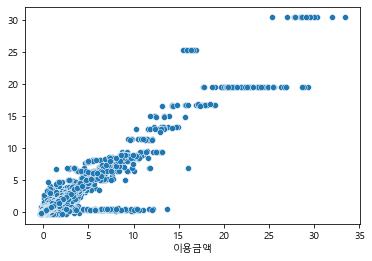

In [62]:
sns.scatterplot(y_test, modelB.predict(X_test))

In [63]:
predictions = [round(value) for value in modelB.predict(X_test)]

In [66]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, modelB.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, modelB.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, modelB.predict(X_test))))

explained_variance_score: 0.9017526921706926
mean_squared_errors: 0.10013528249274228
r2_score: 0.9017206608045869


In [70]:
import xgboost
modelB = xgboost.XGBRegressor(learning_rate=0.1,
                             max_depth=50,
                              n_estimators=1000) 

In [71]:
modelB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=50,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:xlabel='이용금액'>

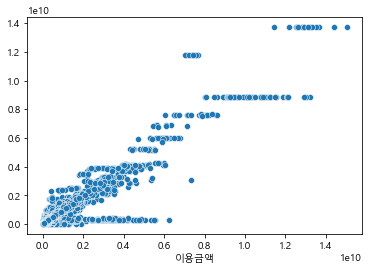

In [72]:
sns.scatterplot(y_test, modelB.predict(X_test))

In [73]:
predictions = [round(value) for value in modelB.predict(X_test)]

In [74]:
print('explained_variance_score: {}'.format(explained_variance_score(y_test, modelB.predict(X_test))))
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, modelB.predict(X_test))))
print('r2_score: {}'.format(r2_score(y_test, modelB.predict(X_test))))

explained_variance_score: 0.9003492485518356
mean_squared_errors: 2.0252765636192588e+16
r2_score: 0.9003084799312053
